In [13]:
# N]otebook for collecting long time intervals from raw data
import numpy as np
import matplotlib.pyplot as plt

filename = "second_collection"
data = np.load((filename+".npz"))

filterZerosOut = True

f_data = {}
for key in data:
    sig = data[key]

    if filterZerosOut:
        sig = sig[sig>=0.01]

    print("User: ", key)
    print("Total number of points: ", len(sig))
    idxs = np.arange(0, len(sig), step=100)   # Discard the last index so lengths match

    X = []
    for i in idxs:
        cut = sig[i : i+1024]
        if len(cut)==1024:
            if np.any(cut>=2):
                # if np.sum(np.diff(np.argwhere(sig<=0.05)[:, 0])>1) >= 2:
                X.append(cut)

    f_data[key] = np.vstack(X) 
    print("Shape of data: ", f_data[key].shape)

User:  A
Total number of points:  507813
Shape of data:  (5068, 1024)
User:  G
Total number of points:  480968
Shape of data:  (4566, 1024)
User:  J
Total number of points:  468778
Shape of data:  (4678, 1024)


<Figure size 640x480 with 0 Axes>

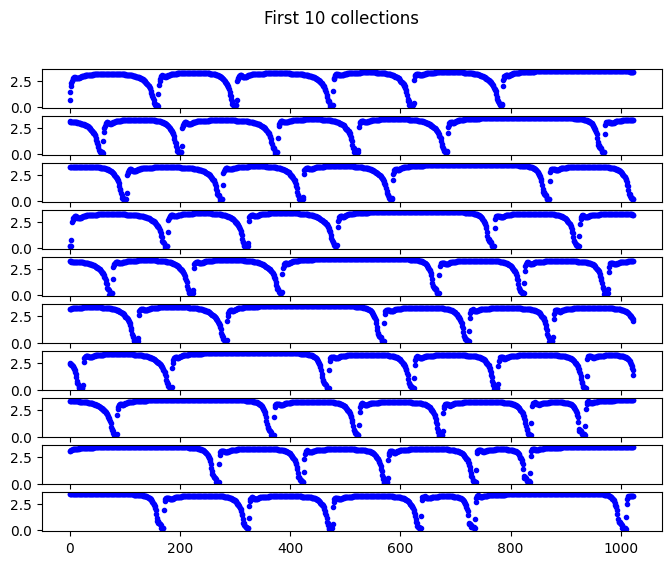

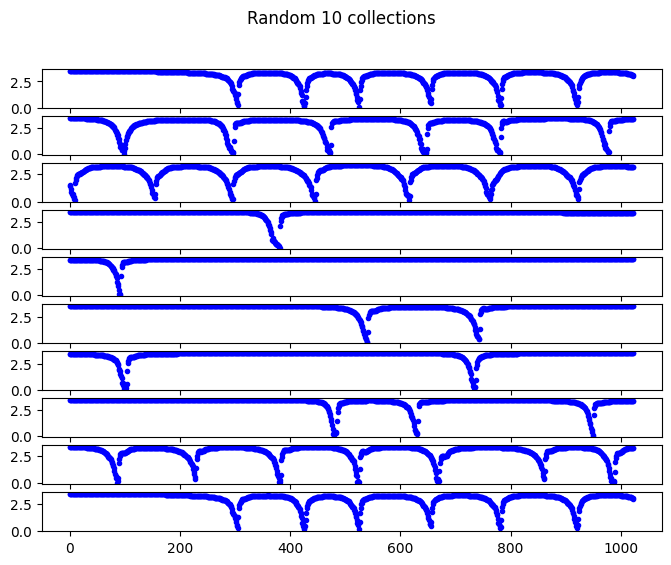

In [14]:
# Print some random samples
key = "A"
n_samp = 10
plt.figure()
r_idxs = np.random.randint(0, len(f_data[key]), size=n_samp)
f_idxs = np.arange(0, n_samp)
for title, idxs in zip([f"First {n_samp} collections", f"Random {n_samp} collections"], [f_idxs, r_idxs]):
    plt.figure(figsize=(8, 6))
    for i, idx in enumerate(idxs):
        s = f_data[key][idx]
        plt.subplot(n_samp, 1, i+1)
        plt.plot(np.arange(s.size), s, "b.")
    plt.suptitle(title)
plt.show()

In [15]:
# Save data to file 
outname = filename if not(filterZerosOut) else filename+"_zeros_out"
output = outname + "_long_data" + f"_{s.size}.npz"
np.savez(output, **f_data )
print("Saved data!")

Saved data!
